<a href="https://colab.research.google.com/github/rsobieski/Reinforcement-Learning-prezentacja/blob/main/Reinforcement_Learning_optymalizacja_strategii_inw_10_04_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Przygotowanie środowiska

In [6]:
# Przygotowanie środowiska
!pip install stable-baselines3[extra]
!pip install gymnasium
!pip install shimmy
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [1]:
# przygotowanie bazowych danych na potrzebę prezentacji.
# do prezentacji wykorzystam cenę akcji AAPL

import yfinance as yf
import pandas as pd

def get_aapl_data(start_date="2022-01-01", end_date="2023-01-01"):
    """
    Pobiera dane historyczne AAPL (Apple) z serwisu yfinance
    w podanym okresie. Zwraca DataFrame z kolumną 'Close' i indeksowaną datami.
    """
    df_raw = yf.download("AAPL", start=start_date, end=end_date, progress=False)

    # tylko cena 'Close'
    if "Close" not in df_raw.columns:
        raise ValueError("Brak kolumny 'Close' w pobranych danych.")

    df = df_raw[["Close"]].copy()

    # szereg - sortowane po dacie
    df.sort_index(inplace=True)

    return df

some_financial_data = get_aapl_data(
    start_date="2024-01-01",
    end_date="2025-04-09"
)

print(some_financial_data.head(10))
print(some_financial_data.tail(10))


YF.download() has changed argument auto_adjust default to True
Price            Close
Ticker            AAPL
Date                  
2024-01-02  184.532089
2024-01-03  183.150391
2024-01-04  180.824356
2024-01-05  180.098694
2024-01-08  184.452560
2024-01-09  184.035080
2024-01-10  185.078812
2024-01-11  184.482391
2024-01-12  184.810425
2024-01-16  182.534073
Price            Close
Ticker            AAPL
Date                  
2025-03-26  221.529999
2025-03-27  223.850006
2025-03-28  217.899994
2025-03-31  222.130005
2025-04-01  223.190002
2025-04-02  223.889999
2025-04-03  203.190002
2025-04-04  188.380005
2025-04-07  181.460007
2025-04-08  172.419998


# **Reinforcement Learning w optymalizacji strategii inwestycyjnych**





---



## **1. Kilka słów o rynkach finansowych**


Rynki finansowe od strony danych to skomplikowana struktura, która reaguje na niezliczone bodźce i potrafi zaskoczyć nawet najbardziej doświadczonych traderów. Budowa modeli inwestycyjnych w takim środowisku to zadanie wyjątkowo złożone – trzeba uwzględnić zarówno dane finansowe, zmienność, niestacjonarność, a także emocje i zachowania uczestników rynku.

Przez długi czas modele dla rynków finansowych były budowane w oparciu o modele regresyjne, metody predykcji szeregów czasowych (np. ARIMA, GARCH) czy modele faktorowe (analizujące główne czynniki napędzające ceny).

Akutalnie jednym z bazowych technik wykorzystywanych przez szybkie modele są np. Random Forest czy boosting (XGBoost, LightGBM), które skutecznie radzą sobie z dużą liczbą cech i niestandardowymi relacjami.




### **1.1. Model naiwny**

Jak  dużym wyzwaniem jest przygotowanie modelu, jest próba pobicia modelu naiwnego. W uproszczeniu jego działanie polega na tym, że aktualna cena to cena z poprzedniego okresu.

Formalny zapis:


\begin{align}
        \hat{y}_{t+1} = y_t
    \end{align}

Nie będziemy wchodzi w temat szeregów czasowych, ale krótka prezentacja działania modelu znajduje się poniżej. Widać na wykresie, że model nawiny podąża za podstawoą wartością (cena zamknięcia).

[*********************100%***********************]  1 of 1 completed


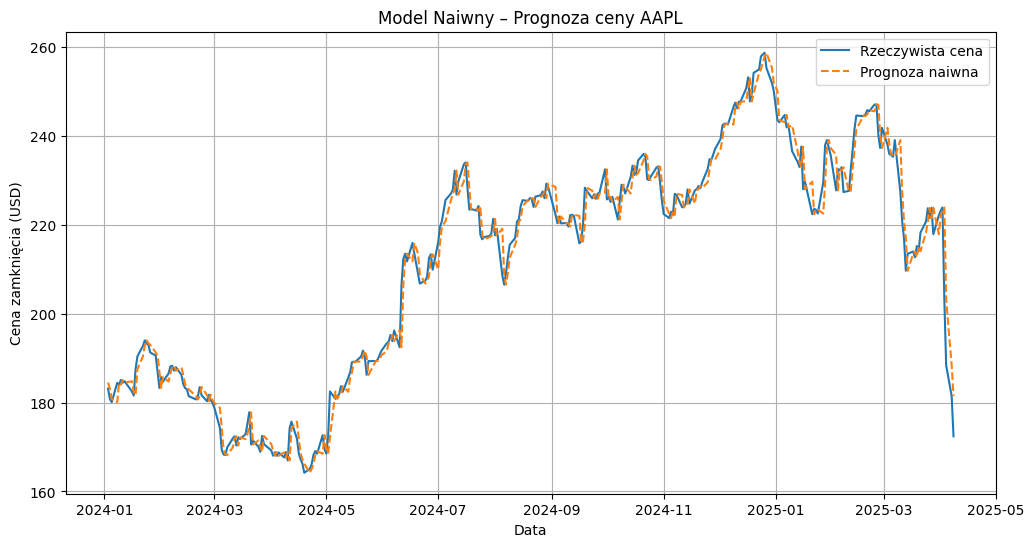

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Pobieranie aktualnej wyceny akcji apple
data = yf.download("AAPL", start="2024-01-01", end="2025-04-09")
prices = data['Close']

# predykcja z modelem naiwnym
naive_pred = prices.shift(1)  # przewidujemy, że cena dzisiaj = cena wczoraj
prices = prices[1:]
naive_pred = naive_pred[1:]

plt.figure(figsize=(12, 6))
plt.plot(prices.index, prices, label="Rzeczywista cena")
plt.plot(naive_pred.index, naive_pred, label="Prognoza naiwna", linestyle='--')
plt.title("Model Naiwny – Prognoza ceny AAPL")
plt.xlabel("Data")
plt.ylabel("Cena zamknięcia (USD)")
plt.legend()
plt.grid(True)
plt.show()


Model nawiny często stosowany jest jako bazowy model (punkt odniesienia) dla modeli budowanych w oparciu o szeregi czasowe czy regresję liniową.

> 🔗 Więcej o modelu naiwnym: [Naïve method](https://otexts.com/fpp3/simple-methods.html#na%C3%AFve-method)

###  **1.2. Reinforcement Learning**

Wspomniany wyżej model naiwny w zestawieniu z różnymi technikami dot. predycji czasowej czy modeli regresyjnych pokazują jaką trudność mają te modele z uchwyceniem dynamicznej natury rynku i ciągłego podejmowania decyzji w czasie. Właśnie tutaj do gry wchodzi Reinforcement Learning (RL) – podejście, w którym model (agent) uczy się poprzez interakcję ze środowiskiem, w tym przypadku z rynkiem czy symulacją rynku.

RL dostarcza agentowi mechanizmu „nagród” i „kar”, dzięki którym może z czasem ewoluować w coraz skuteczniejszego „tradera” czy zarządzającego portfelem.



---



## **2. Podstawy RL na prostych przykładach**

### **2.1. Co to jest Reinforcement Learning?**


Reinforcement Learning (uczenie przez wzmacnianie) to dziedzina sztucznej inteligencji, w której agent (algorytm) uczy się optymalnego działania w pewnym środowisku (np. rynku finansowym, grze komputerowej), podejmując akcje i otrzymując za nie nagrody.

* **Agent** to podmiot uczący się (np. algorytm podejmujący decyzje).
* **Środowisko** to wszystko, z czym agent wchodzi w interakcję (np. dane rynkowe, zasady gry).
* **Akcje** to możliwe decyzje podejmowane przez agenta (np. kupno, sprzedaż).
* **Stany** (obserwacje) to informacje o aktualnej sytuacji w środowisku (np. obecny kurs akcji).
* **Nagroda** to sygnał, czy dana akcja w określonym stanie przyniosła korzyść (np. zysk) czy stratę.











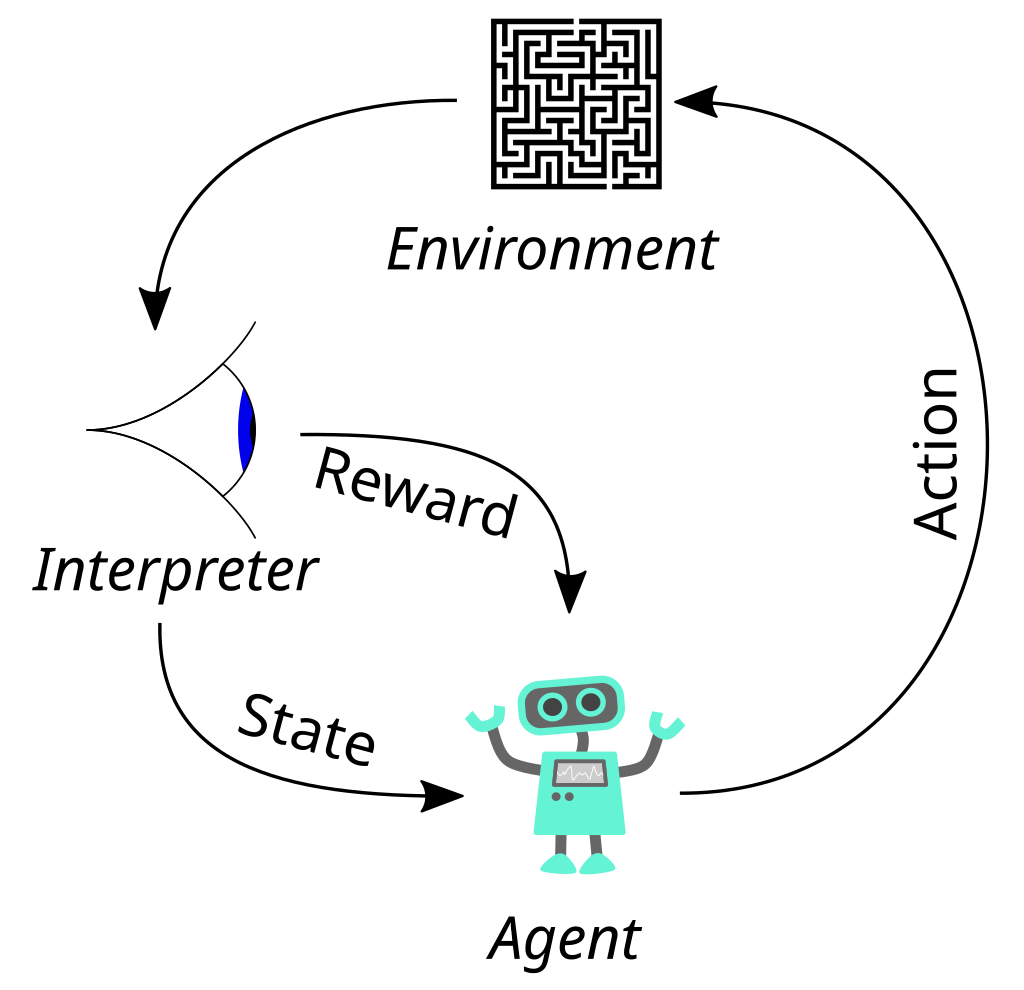

> 🔗Wikipedia-> [Reinforcement Learning](https://en.wikipedia.org/wiki/Reinforcement_learning)

### **2.2. Porównanie z innymi rodzajami uczenia**

**Uczenie nadzorowane (supervised)**

Mamy gotowe przykłady z poprawną odpowiedzią (np. zdjęcia kotów i psów z etykietą „kot” lub „pies”).

Model uczy się rozpoznawać wzorce, aby na nowe dane odpowiedzieć jak najbardziej poprawnie.

**Uczenie nienadzorowane (unsupervised)**

Nie mamy etykiet ani odpowiedzi – model sam szuka ukrytych struktur w danych (np. grupuje klientów według zachowań zakupowych).

**Uczenie przez wzmacnianie (RL)**

Nie mamy bezpośrednio „poprawnych odpowiedzi” dla każdego przykładu.

Agent eksperymentuje w środowisku, a w zamian otrzymuje nagrodę (lub karę) zależną od swoich działań.

Celem jest maksymalizacja całkowitej nagrody w dłuższym okresie.


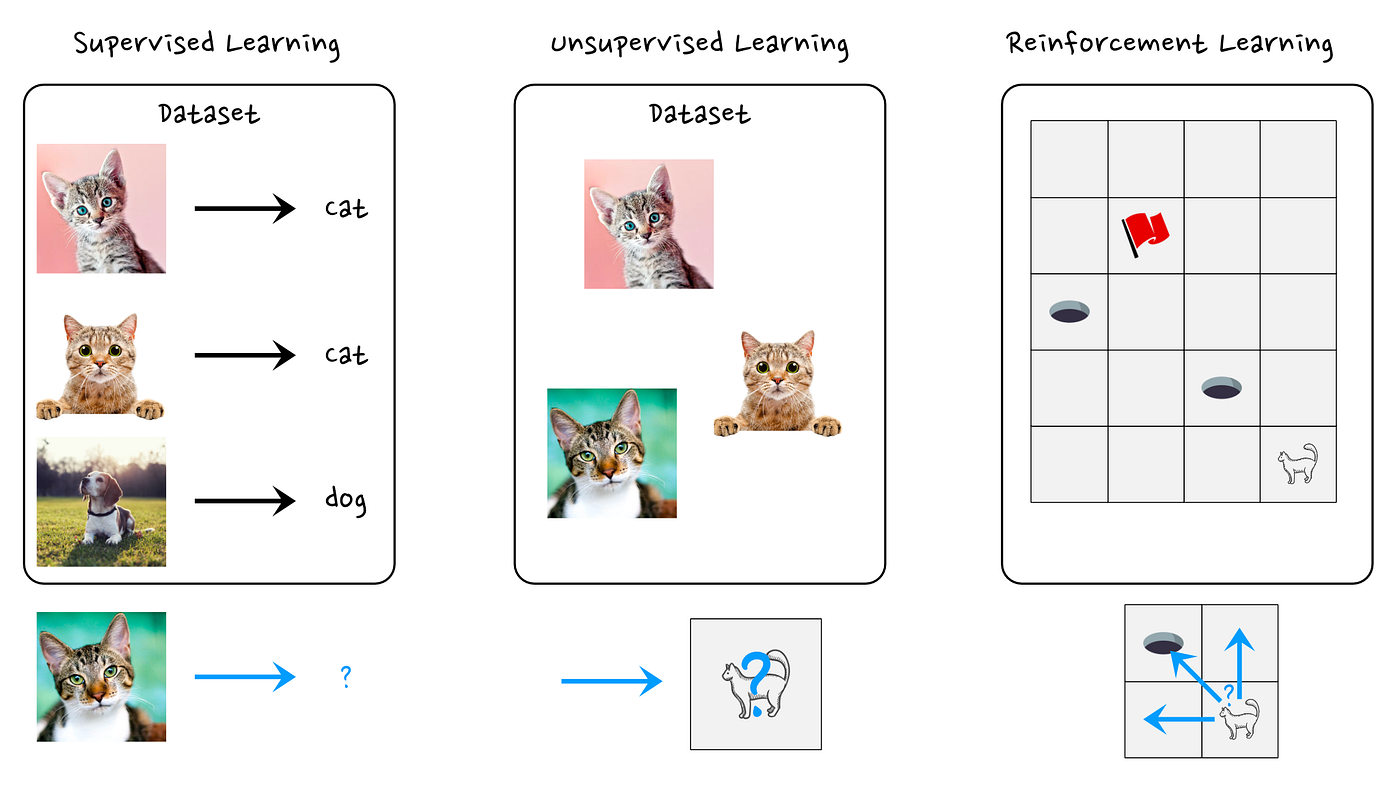

> 🔗Medium -> [Reinforcement Learning: An introduction](https://medium.com/@cedric.vandelaer/reinforcement-learning-an-introduction-part-1-4-866695deb4d1)

### **2.3. Przykład RL w realnym środowisku**

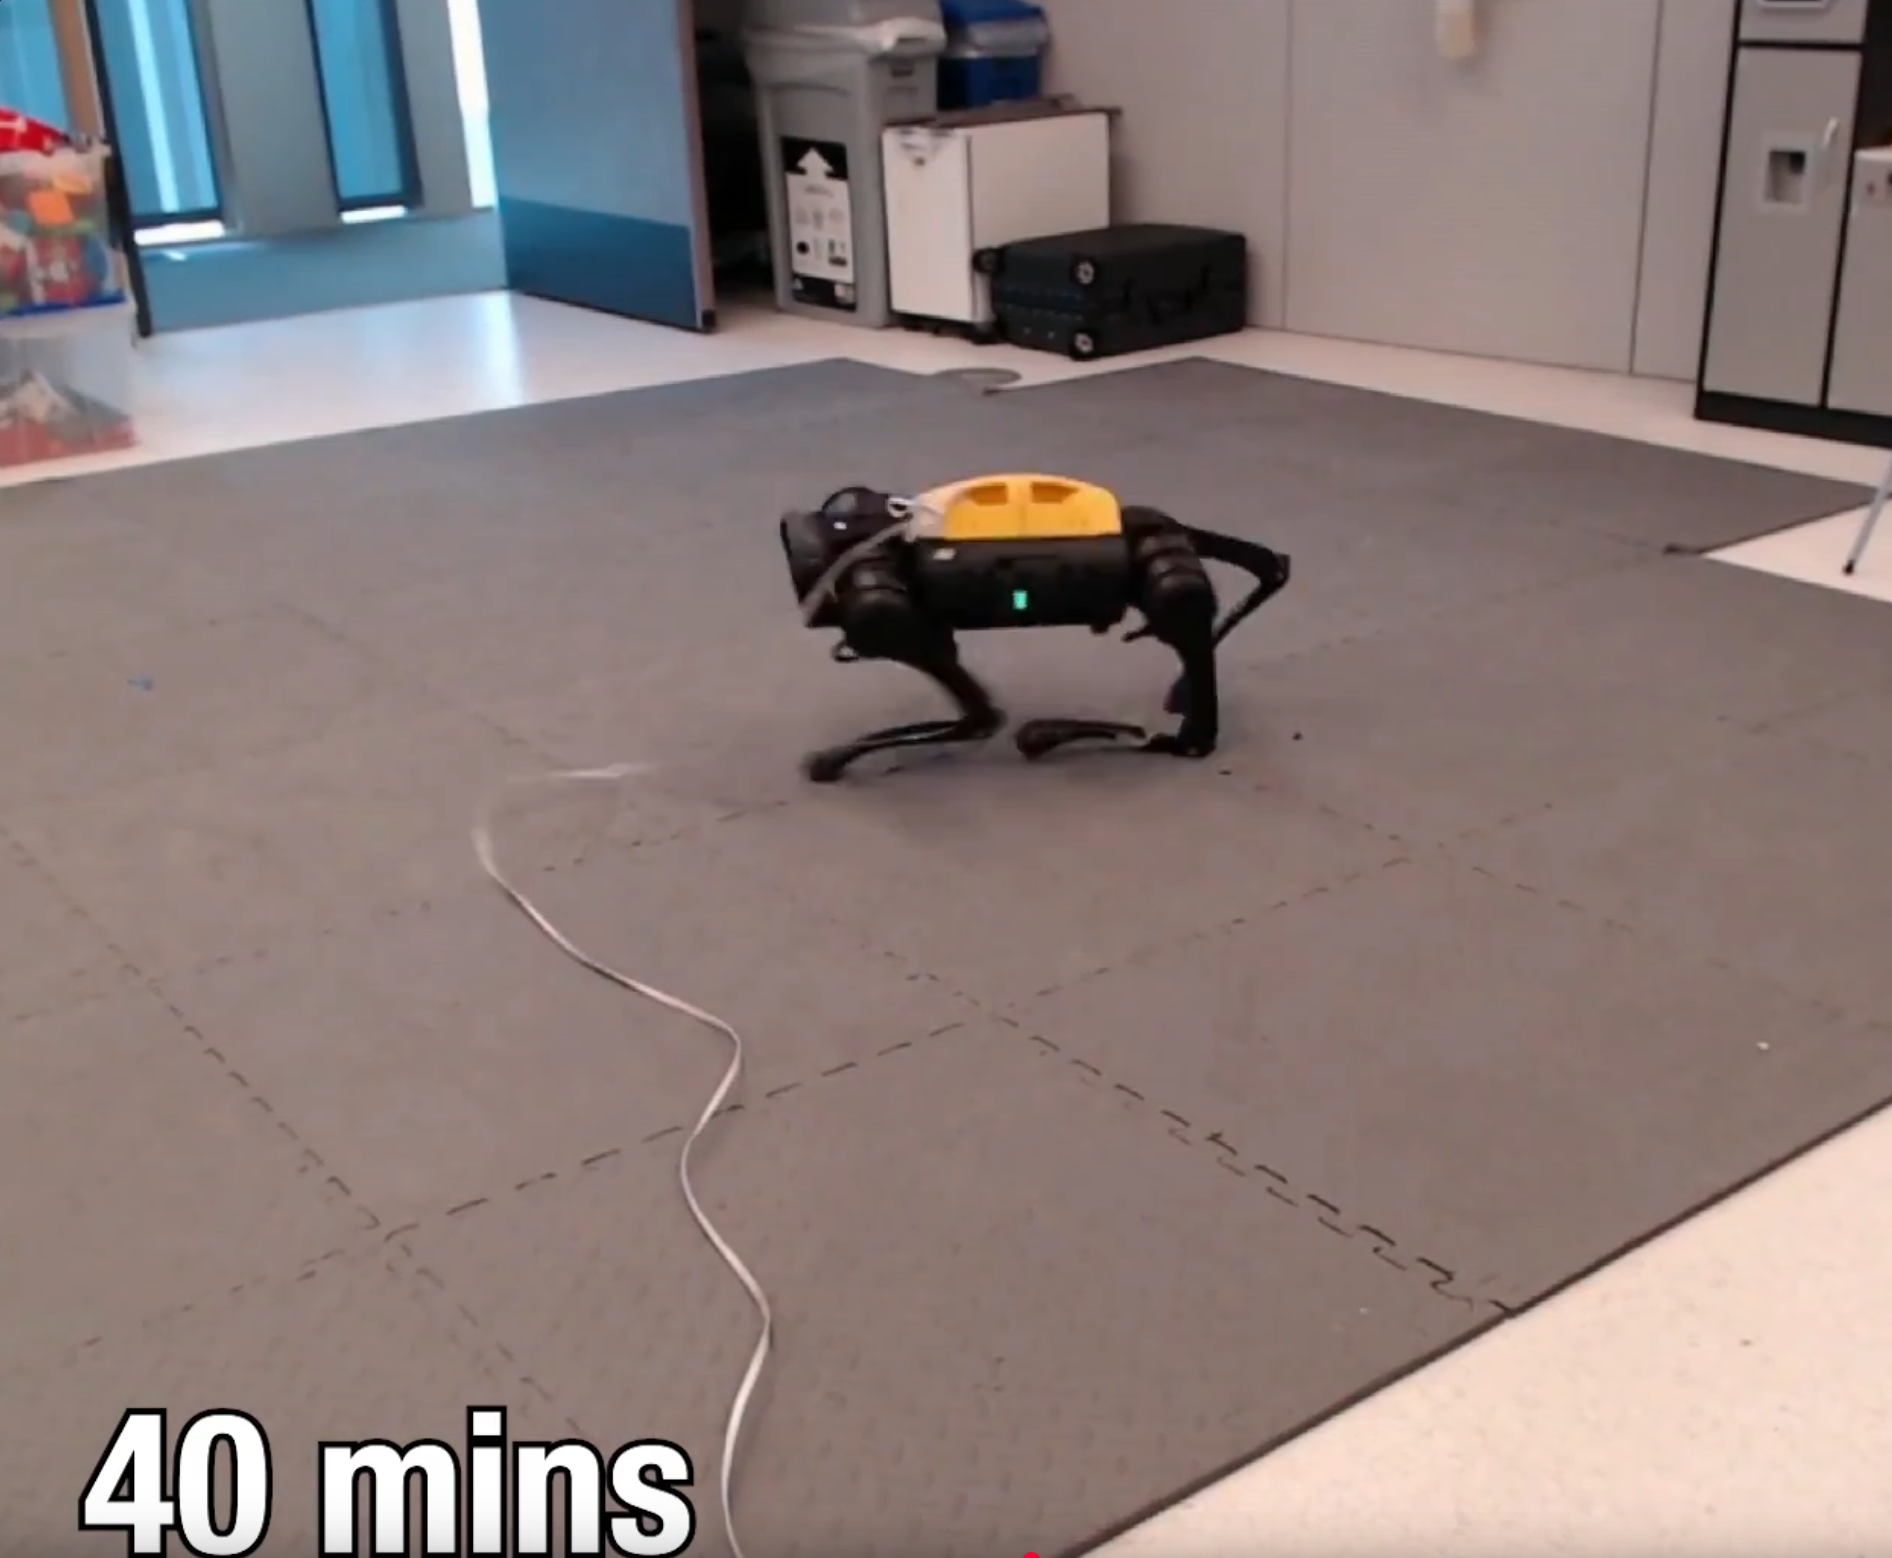

[Learning to Walk in the Real World in 1 Hour (No Simulator)](https://www.youtube.com/watch?v=xAXvfVTgqr0)

Link do prezentowanego projektu: (https://danijar.com/project/daydreamer/)



---



## **3. RL w finansach - problemy i wyzwania**

Rynek finansowy ze zwzględu na swoją charakterystykę jest trudnym zestawem danych do trenowania modeli RL. Kilka kluczowych problemów i wyzwań, ale także zastosowań przedstawiam poniżej.

### **3.1. Niestacjonarność rynku**

Rynki finansowe podlegają ciągłym, często trudnym do przewidzenia zmianom. Pojawiają się nowe informacje, zmieniają się stopy procentowe, panują odmienne nastroje inwestorów, na cenę mają bezpośredni wpływ trudne do przewidzenia wydarzenia. W konsekwencji statystyczne właściwości danych (np. średnia, wariancja, korelacje między aktywami) nie są stałe w czasie (concept drift), a środowisko w jakim pracujemy przy każdej iteracji może mieć inne kluczowe cechy.

**Wpływ na RL:**

Agent musi na bieżąco przystosowywać się do nowych warunków (może wymagać częstego retrainingu). Model wytrenowany na historycznych danych może szybko tracić trafność, gdy wejdziemy w nowy reżim rynkowy.

Modele statyczne (np. klasyczne modele regresyjne) mają tendencję do „rozjazdu” w czasie; RL może próbować to kompensować poprzez ciągłą adaptację.

**Czarne łabędzie, czyli nagłe zmiany reżimu rynkowego:**

* **Kryzys subprime z 2008** – relacje między klasami aktywów diametralnie się zmieniły.

* **Pandemia COVID-19** – nieoczekiwana zmienność i luki cenowe w marcu 2020.

* **Zmiany polityki banków centralnych** – wpływające na wyceny obligacji i walut.

* **Cła Trumpa** - wpływ na wyceny większości aktywów (obligacji, akcji, surowców, walut) oraz wpływ na dane makroekonomiczne.


Skutki tych zmian maja bardzo duży wpływ na strategie przyjmowane przez modele modele RL, dlatego modele takie wyamagają częstej adaptacji oraz sotoswania dedykowanych technik adaptacyjnych

**Retrain (ponowne uczenie):**

Agent powinien mieć możliwość regularnego aktualizowania parametrów na najnowszych danych (np. co tydzień, co miesiąc). Dzięki temu powstaje „model przesuwającego się okna” (rolling window), gdzie nowa partia danych jest dołączana do treningu, a najstarsza jest usuwana.

**Adaptacyjne strategie:**

Jedną z technik jest włączanie do modelu mechanizmy wykrywania zmiany reżimu (tzw. regime switching) lub wykorzystują meta-learning, by szybciej przystosować się do nietypowych warunków.

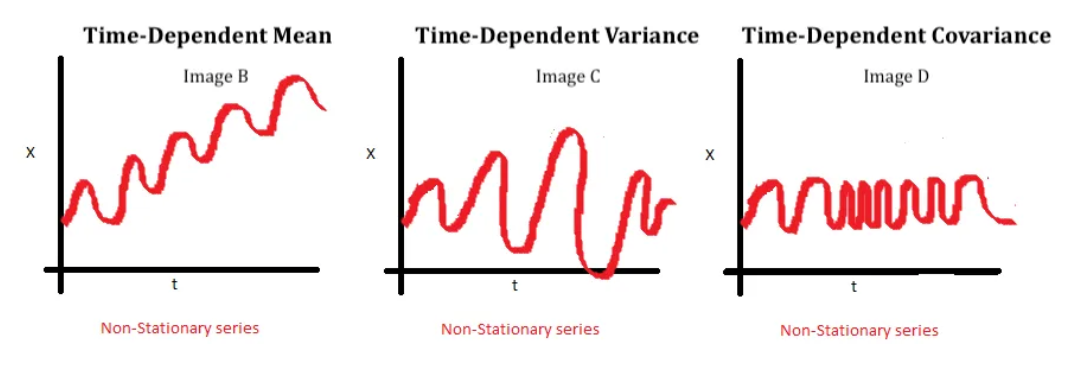

> 🔗Medium -> [Understanding Stationarity vs. Non-Stationarity in Financial Markets](https://medium.com/@seattle_4296/in-5-minutes-understanding-stationarity-vs-non-stationarity-in-financial-markets-f7339717f5c5)

### **3.2.  Reward sparsity - Niewielka częstotliwość „nagród”**

**Czym jest nagroda w RL?**

W finansach typową nagrodą może być zysk lub strata z pozycji, ewentualnie określona funkcja (np. Sharpe Ratio, penalizowanie drawdownu). Jednak faktyczna realizacja (zysk/strata) ujawnia się rzadko i zależy od wielu czynników zewnętrznych.

**Dlaczego to problem?**

W klasycznych zadaniach RL (np. proste gry) agent dostaje nagrodę niemal po każdym ruchu. W inwestycjach feedback jest odległy w czasie (np. dopiero po zamknięciu pozycji - pod koniec epizodu rynkowego). Dla agenta oznacza to, że przez długi okres może nie otrzymywać wyraźnych sygnałów, czy działa poprawnie.

Dodatkowo pomiędzy akcją a nagrodą mogą nastąpic inne akcje o przeciwnym znaczenie. Możemy też mieć rozciągnięte w czasie skutki jednej decyzji (kupno akcji i trzymanie jej przez dłuższy okres, zwiększanie lub zmniejszanie pozycji).

**Strategie pracy z RL**

Ze względu na charektrystykę rynku finansowego model RL i brak częstych informacji zwrotnych, trenowanie modelu jest utrudnione i wymaga zastosowania specjalnych strategii. Kilka prostych przykładów:

* **Zastosowanie shapingu nagrody** zamiast czekać na finalny zysk, można naliczać mniejsze nagrody w trakcie (np. dzienny przyrost wartości portfela).
* **Sharpe Ratio** zamiast używać surowego zysku, można nagradzać agenta za uzyskiwanie stabilnych stóp zwrotu, gdzie ważnym czynnikiem jest zmienność.
Sharpe Ratio promuje strategie z wyższą średnią stopą zwrotu przy mniejszej zmienności.
* **Uzupełniające sygnały** Kary za wysokie koszty transakcyjne, dużą liczbę operacji w krótkim czasie albo zbyt duże obsunięcie kapitału (drawdown).

Dzięki temu agent nie jest zostawiony wyłącznie z „nagrodą końcową”, ale otrzymuje częstsze wskazówki, które kierują go do właściwych decyzji.



### **3.3. Zastosowania: Dynamiczna alokacja portfela**

Agent RL w każdym kroku decyzyjnym wybiera, w jaki sposób dzielić kapitał pomiędzy różne aktywa (akcje, obligacje, ETF-y, surowce itp.). Może to być podejście dyskretne („kup/sprzedaj/utrzymaj”) lub ciągłe (wybór udziału w [−1,+1] dla każdego aktywa).

**Korzyści:**

Możliwość adaptacji do zmieniających się korelacji między aktywami.

Uczenie się „co działa” na danym rynku – zwłaszcza w określonych reżimach (np. hossa/spadki).

**Wyzwania:**

Duża zmienność i ryzyko overfittingu.

Konieczność korzystania z risk management w funkcji nagrody (np. ograniczenie maksymalnego drawdownu).

### **3.4. Zastosowania: Strategie arbitrażowe**

Wyszukiwanie krótkotrwałych nieefektywności (np. różnic cen na powiązanych instrumentach) i automatyczne zawieranie transakcji kompensujących.

RL może się okazać skuteczne w wychwytywaniu częstych, acz niewielkich okazji, gdzie stawka jest duża (ryzyko, koszty transakcyjne, timing).

**Zalety:**

Automatyzacja procesów w czasie bliskim rzeczywistemu (HFT – High Frequency Trading).

Możliwość ciągłego „dokształcania” modelu przy zmianach warunków rynkowych.

**Ograniczenia:**

Bardzo krótki czas decyzyjny – w HFT liczą się mikrosekundy. Modele RL mogą wymagać dedykowanego sprzętu (hardware acceleration).

Konieczność ultra-precyzyjnej inżynierii danych (tick data, order book data).

### **3.5. Zastosowania: Zarządzanie ryzykiem**

Czyste maksymalizowanie zysku może prowadzić do bardzo ryzykownych decyzji (np. duża dźwignia).

Dlatego kluczowe jest, aby agent wziął pod uwagę ryzyko w procesie decyzyjnym.

**Value-at-Risk (VaR)**

Definicja: VaR na poziomie np. 95% (kwantyl rozkładu strat 5%) mówi, że z prawdopodobieństwem 95% strata nie przekroczy pewnej kwoty (w ustalonym horyzoncie, np. dziennym).

Możemy ukarać agenta za przekraczanie określonego VaR. Wpływa to na politykę podejmowania decyzji (agent nie podejmie zbyt ryzykownych transakcji).

RL może aktywnie modyfikować pozycje, by utrzymać straty w ryzach. Przykładowo – jeżeli obecna ekspozycja zbliża się do dopuszczalnych limitów VaR, agent ogranicza wielkość pozycji.

**Conditional Value-at-Risk (CVaR)**

Rozszerzenie VaR: pokazuje średnią stratę w sytuacjach, gdy przekroczony zostanie próg VaR. Tzw. Expected Shortfall – średnia wielkość straty, jeśli już znajdziemy się poza VaR.

Można włączyć CVaR do funkcji nagrody lub wprowadzić dodatkowe ograniczenie. Daje to bardziej konserwatywne strategie, chroniące przed "ryzykuem ogona rozkładu" (tail risk).

**Korzyści:**

Możliwość uwzględnienia poziomu ryzyka w samej definicji nagrody (np. kara za przekroczenie VaR > X).

Stosowanie w portfelach stricte nastawionych na ochronę kapitału przy ustalonym poziomie stopy zwrotu (np. fundusze typu risk parity).

Monitoring w czasie rzeczywistym - nawet najlepiej wytrenowany agent wymaga kontroli, czy nie generuje nadmiernych strat przy zmianie warunków rynkowych.

**Trudności:**

Dokładna estymacja VaR/CVaR w warunkach szybkich zmian rynkowych bywa trudna do określenia.

Dane ekstremalne (czarne łabędzie) mogą zniekształcić wycenę ryzyka.



---



## **4. Środowiska i biblioteki do RL**

### **4.1. Gym/Gymnasium: standardowe interfejsy RL**

To biblioteka (wcześniej rozwijana pod nazwą OpenAI Gym, obecnie oficjalnie wspierana jako Gymnasium przez organizację Farama Foundation) zapewniająca standardowy interfejs do zadań Reinforcement Learning.

Udostępnia zestaw środowisk (np. gry Atari, zadania z robotyki), w których agent może się uczyć podejmowania decyzji.

Każde środowisko posiada metody reset() (inicjalizacja) i step(action) (wykonanie akcji, zwrócenie nowego stanu i nagrody).

Dzięki ujednoliconemu API biblioteka pozwala używać tych samych algorytmów RL do różnych problemów, bez przepisywania całego kodu.

Biblioteka jest otwarta i aktywnie rozwijana, co znacznie ułatwia start w projektach RL.

(https://gymnasium.farama.org/index.html)

### **4.2. Gym-anytrading: środowisko do testowania strategii inwestycyjnych**

Rozszerzenie Gym, w którym przygotowano specjalne środowiska do testowania strategii handlowych (tradingowych).

Może służyć do szybkiego prototypowania algorytmów inwestycyjnych w stylu RL.

Środowiska z danymi giełdowymi (np. serie cen akcji), gdzie agent w kolejnych krokach dostaje aktualną cenę i decyduje: kupować, sprzedawać czy trzymać?

Możliwość customizacji: możesz dołączyć własne dane i dopasować funkcję nagrody, co daje elastyczność w eksperymentach.

(https://github.com/AminHP/gym-anytrading)

### **4.3. Stable Baselines3 (SB3): gotowe algorytmy RL**


Biblioteka w Pythonie zawierająca implementacje najpopularniejszych algorytmów RL, m.in.:

* PPO (Proximal Policy Optimization)

* DDPG (Deep Deterministic Policy Gradient)

* A2C/A3C (Advantage Actor-Critic)

* SAC (Soft Actor-Critic)

* DQN (Deep Q-Network)

Łatwość użycia: wystarczy zainicjalizować model (model = PPO("MlpPolicy", env, ...)) i wywołać model.learn(...).

Duża społeczność: sporo przykładów, tutoriali, gotowych skryptów na GitHubie i w dokumentacji.

Stabilność i zgodność: SB3 obsługuje standardowy interfejs Gym/Gymnasium, więc można łączyć je z wieloma środowiskami (w tym Gym-anytrading).

(https://stable-baselines3.readthedocs.io/en/master/)

### **4.4. Ray RLlib: skalowalne rozwiązanie do trenowania RL**



Biblioteka do RL na dużą skalę, oparta na frameworku Ray, który ułatwia uruchamianie zadań równolegle (np. na klastrze lub w chmurze).

Idealna, gdy chcemy trenować wiele agentów jednocześnie albo używać rozległych zasobów obliczeniowych.

Duże zbiory danych – np. tick data z rynku finansowego, gdzie trzeba przetworzyć miliony kroków.

Zrównoleglone środowiska – symulowanie wielu epizodów tradingu naraz, by przyspieszyć uczenie.

Eksperymenty hiperskalowalne – możliwość łatwej migracji do chmury (AWS, GCP, Azure).

(https://docs.ray.io/en/latest/rllib/index.html)

### **4.5. Przygotowanie bazowego środowiska**

Poniżej pokazany jest minimalny przykład klasy środowiska w stylu Gym.

**Stan:** W przykładzie to wektor:
```
[cena_bieżąca, SMA5, SMA10, balance, pozycja]
```
Można go rozszerzyć o dodatkowe czynniki fundamentalne, analizy techniczne, itp.

**Akcja:** Dyskretna {0: sprzedaj, 1: trzymaj, 2: kup}.

**Nagroda:** Zmienna zależna od aktualnego zysku/straty. Przykładowo, jeżeli mamy pozycję długą i cena rośnie – dostajemy dodatnią nagrodę. Możemy dodać do tego karę za drawdown czy za dużą zmienność.

**Koniec epizodu (done):** Następuje, gdy dojdziemy do końca danych historycznych. Możemy na zakończenie dodać premię/karę zależną od finalnej wartości portfela.



---



In [24]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from gym import spaces
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv

class SimpleTradingEnv(gym.Env):
    def __init__(self, df, initial_balance=10000):
        super(SimpleTradingEnv, self).__init__()

        # dla MultiIndex, kolumna  'Close'
        if isinstance(df.columns, pd.MultiIndex):
            # print("Oryginalne kolumny:", df.columns)
            close_col = None
            for col in df.columns:
                for item in col:
                    if str(item).lower() == "close":
                        close_col = col
                        break
                if close_col is not None:
                    break
            if close_col is None:
                raise KeyError("Nie znaleziono kolumny 'Close' w danych.")
            df = df[[close_col]].copy()
            df.columns = ["Close"]
        else:
            df = df.copy()

        # resetujemy indeks, aby DataFrame miał ciągły indeks liczbowy
        self.df = df.reset_index(drop=True)
        self.initial_balance = initial_balance

        # definiujemy akcje: 0 = sprzedaj, 1 = trzymaj, 2 = kup
        self.action_space = spaces.Discrete(3)

        # definiujemy obserwacje: [cena, SMA5, SMA10, saldo, pozycja]
        self.observation_space = spaces.Box(
            low=-np.inf,
            high=np.inf,
            shape=(5,),
            dtype=np.float32
        )
        self.reset()

    def _get_observation(self):
        # obliczamy 5-dniową i 10-dniową średnią kroczącą
        sma5 = self.df['Close'].rolling(5).mean().iloc[self.current_step]
        sma10 = self.df['Close'].rolling(10).mean().iloc[self.current_step]

        # jeśli któraś z wartości jest nan, zastępujemy ją 0.0
        sma5 = sma5 if not np.isnan(sma5) else 0.0
        sma10 = sma10 if not np.isnan(sma10) else 0.0

        obs = np.array([
            self.df.loc[self.current_step, 'Close'],
            sma5,
            sma10,
            self.balance,
            self.position
        ], dtype=np.float32)
        return obs

    def step(self, action):
        # zapamiętujemy poprzednią cenę
        prev_price = self.df.loc[self.current_step, 'Close']

        self.current_step += 1

        # test czy nie koniec danych
        done = (self.current_step >= len(self.df) - 1)
        current_price = self.df.loc[self.current_step, 'Close']

        reward = 0.0

        if action == 0:  # sprzedaj
            if self.position == 1:
                profit = (current_price - prev_price) * 1
                self.balance += profit
            self.position = 0

        elif action == 1:  # trzymaj
            pass

        elif action == 2:  # kup
            if self.position == 0:
                # W uproszczonym przykładzie nie zapisujemy ceny zakupu
                pass
            self.position = 1

        # jeżeli pozycja jest otwarta, nagroda to zmiana ceny
        if self.position == 1:
            reward = (current_price - prev_price) * 1

        obs = self._get_observation()

        # obliczamy wartość portfela (saldo + niezrealizowany zysk)
        portfolio_value = self.balance
        if self.position == 1:
            portfolio_value += (current_price - prev_price)

        # jśli to ostatni krok, dodajemy premię/karę końcową
        if done:
            reward += (portfolio_value - self.initial_balance)

        return obs, reward, done, {}

    def reset(self):
        self.current_step = 0
        self.balance = self.initial_balance
        self.position = 0  # 1 - długa pozycja, 0 - brak pozycji
        return self._get_observation()

To środowisko wykorzystamy przy prezentacji poszczególnych algorytmów RL

## **5. Techniki i algorytmy Deep RL**

### **5.1. Deep Q-Learning (DQN)**

**Q-Learning (podstawowy)**

Tradycyjnie opiera się na tablicy Q (Q-table), w której każdemu stanowi i akcji przypisana jest wartość Q(s,a).

W przypadku jednak dużych przestrzeni stanów (np. ceny, wskaźniki, itp.) taka tablica jest niepraktyczna z uwagi na pamięć.

Alternatywą dla niej jest:

**Deep Q-Learning**

Zamiast tablicy Q stosujemy sieć neuronową do aproksymacji Q(s,a).

W każdym kroku uczymy sieć, by przewidywała wartość Q dla pary (s,a), a aktualizacja odbywa się w oparciu o tzw. Bellman equation.

**Zalety:**

* Prostota implementacji – koncepcyjnie DQN jest dość prosty do zrozumienia (policy wybierana przez arg⁡max ⁡Q(s,a)).

* Odpowiedni dla akcji dyskretnych (np. {kup, sprzedaj, trzymaj}).

* Skuteczny w problemach, gdzie mamy wyraźnie dyskretną liczbę decyzji.

**Ograniczenia:**

* Słabo radzi sobie z akcjami ciągłymi (np. ustalenie wielkości pozycji w zakresie [−1,1]).

* Niestabilne trenowanie, jeśli nie zastosujemy bufora pamięci (experience replay) oraz mechanizmu target network (jak w klasycznym artykule 🔗[„Playing Atari with Deep Reinforcement Learning”](https://arxiv.org/abs/1312.5602)).

* Może mieć trudności w sytuacjach z dużą zmiennością rynkową lub rzadkimi nagrodami.

> Dokumentacja: 🔗[SB3 DQN](https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html)

In [47]:
import gym
import pandas as pd
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv

# danych AAPL z yfinance
some_financial_data = yf.download("AAPL", start="2022-01-01", end="2025-04-09", progress=False)

# kolumnę "Close", jeżeli dane mają MultiIndex, ta operacja MultiIndex
some_financial_data = some_financial_data[["Close"]].copy()

# opcjonalny filtr – pozostawiamy tylko ceny powyżej 100
some_financial_data = some_financial_data[some_financial_data["Close"] > 100].copy()

print("Kształt danych:", some_financial_data.shape)
print("Początek danych:")
print(some_financial_data.head())
print("Koniec danych:")
print(some_financial_data.tail())

# inicjalizacja środowiska tradingowego
env = SimpleTradingEnv(df=some_financial_data)

# wrapper DummyVecEnv dla stable-baselines3
vec_env = DummyVecEnv([lambda: env])

# konfiguracja i inicjalizacja modelu DQN
model_dqn = DQN(
#     policy="MlpPolicy",
#     env=vec_env,
#     learning_rate=1e-3,
#     buffer_size=10000,
#     learning_starts=100,
#     batch_size=32,
#     verbose=1,
#     # total_timesteps=3000,
#     exploration_fraction=0.1,
#     exploration_initial_eps=1.0,
#     exploration_final_eps=0.01,
    policy="MlpPolicy",
    env=vec_env,
    learning_rate=1e-3,     # np. 0.001
    buffer_size=2000,       # bufor replay
    learning_starts=100,    # wcześniej zaczynamy aktualizacje
    batch_size=32,
    gamma=0.99,
    exploration_fraction=0.5,  # przez 50% treningu schodzi z 1.0 -> final_eps
    exploration_initial_eps=1.0,
    exploration_final_eps=0.01,
    verbose=1

)

# Trening modelu
model_dqn.learn(total_timesteps=50000)



Kształt danych: (819, 1)
Początek danych:
Price            Close
Ticker            AAPL
Date                  
2022-01-03  178.879913
2022-01-04  176.609634
2022-01-05  171.911835
2022-01-06  169.042084
2022-01-07  169.209152
Koniec danych:
Price            Close
Ticker            AAPL
Date                  
2025-04-02  223.889999
2025-04-03  203.190002
2025-04-04  188.380005
2025-04-07  181.460007
2025-04-08  172.419998
Using cuda device


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


----------------------------------
| rollout/            |          |
|    exploration_rate | 0.87     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 888      |
|    time_elapsed     | 3        |
|    total_timesteps  | 3272     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 11.9     |
|    n_updates        | 792      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.741    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 775      |
|    time_elapsed     | 8        |
|    total_timesteps  | 6544     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 8.21     |
|    n_updates        | 1610     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rat

Kilka pierwszych rekordów:
Step=0, Prev=178.87991333007812, Curr=176.60963439941406, Portfolio=10000
Step=1, Prev=176.60963439941406, Curr=171.91183471679688, Portfolio=10000
Step=2, Prev=171.91183471679688, Curr=169.04208374023438, Portfolio=10000
Step=3, Prev=169.04208374023438, Curr=169.2091522216797, Portfolio=10000
Step=4, Prev=169.2091522216797, Curr=169.22877502441406, Portfolio=10000


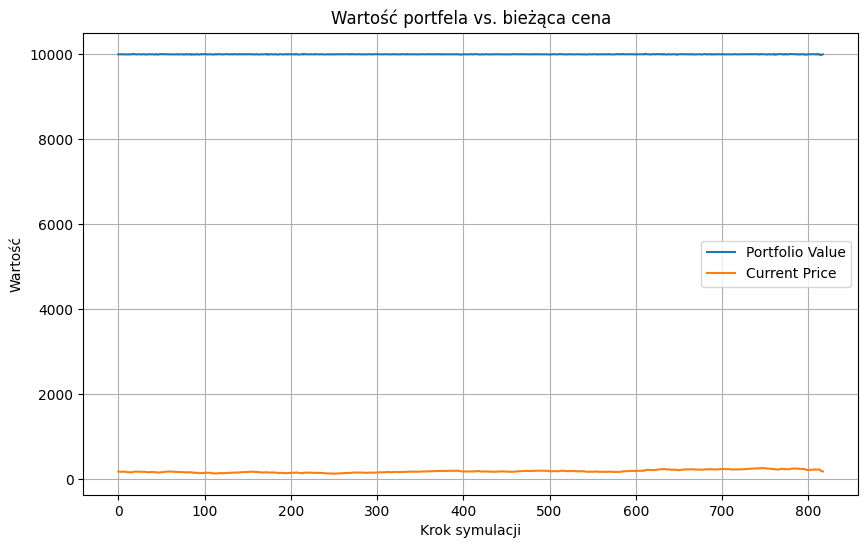

In [48]:
# reset środowiska
obs = vec_env.reset()
done = [False]

# listy do gromadzenia wyników
portfolio_values = []
current_prices = []
previous_prices = []
steps = []

# pobieramy dostęp do faktycznego środowiska (w środku DummyVecEnv)
env_ = vec_env.envs[0]

step_count = 0

while not done[0]:
    # agent decyduje o akcji
    action, _states = model_dqn.predict(obs, deterministic=True)

    # wykonanie akcji w środowisku
    obs, reward, done, info = vec_env.step(action)

    # obliczamy bieżącą wartość portfela
    current_price = env_.df.loc[env_.current_step, 'Close']
    # jeśli current_step == 0, ustalamy prev_price = current_price, by uniknąć -1 w indeksie
    prev_price = (env_.df.loc[env_.current_step - 1, 'Close']
                  if env_.current_step > 0
                  else current_price)

    # Podstawowa logika z environmentu:
    portfolio_value = env_.balance
    if env_.position == 1:
        portfolio_value += (current_price - prev_price)

    # Zapisujemy do list
    portfolio_values.append(portfolio_value)
    current_prices.append(current_price)
    previous_prices.append(prev_price)
    steps.append(step_count)

    step_count += 1

# Wypisanie (opcjonalne) kilku wartości
print("Kilka pierwszych rekordów:")
for i in range(min(5, len(steps))):
    print(f"Step={steps[i]}, Prev={previous_prices[i]}, Curr={current_prices[i]}, Portfolio={portfolio_values[i]}")


plt.figure(figsize=(10,6))
plt.plot(steps, portfolio_values, label="Portfolio Value")
plt.plot(steps, current_prices, label="Current Price")
plt.xlabel("Krok symulacji")
plt.ylabel("Wartość")
plt.title("Wartość portfela vs. bieżąca cena")
plt.grid(True)
plt.legend()
plt.show()

In [49]:
min(portfolio_values), max(portfolio_values)

(np.float64(9980.119064331055), np.float64(10013.983016967773))

### **5.2.  Actor-Critic (A2C, A3C)**

Rozdzielenie funkcji akcji (policy) i oceny (critic)

**Actor:** Sieć/polityka *πθ(a∣s)*, która bezpośrednio decyduje o akcji w stanie s.

**Critic:** Sieć, która ocenia wartości stanu (lub stanu-akcji). Informuje aktora, jak dobre były wybierane akcje.

**A2C (Advantage Actor-Critic):**

Wariant, w którym *Advantage = Q(s,a)−V(s)* jest używane do stabilniejszej aktualizacji polityki.

**A3C:**

Asynchronous Advantage Actor-Critic – kilka agentów trenuje się równolegle na różnych kopiach środowiska (zwykle przyspiesza trenowanie).





**Zalety:**

Bardziej efektywne i stabilniejsze uczenie w porównaniu do podstawowego DQN, szczególnie przy problemach sekwencyjnych.

Łatwiejsze rozszerzanie na problemy z akcjami ciągłymi (choć tu częściej używa się DDPG/SAC, niemniej Actor-Critic to ogólny framework).

Możliwość równoległego trenowania (A3C) przyspiesza eksplorację w większych problemach.

**Ograniczenia:**

Wciąż może być niestabilny w przypadku niestacjonarnych danych finansowych.

Wymaga odpowiedniej inżynierii nagrody i normalizacji danych, aby polityka skutecznie się uczyła.



**Przykładowy kod z użyciem SB3 (A2C)**

Dokumentacja (https://stable-baselines3.readthedocs.io/en/master/modules/a2c.html)

In [38]:
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv

env = SimpleTradingEnv(df=some_financial_data)
vec_env = DummyVecEnv([lambda: env])

model_a2c = A2C(
    policy="MlpPolicy",
    env=vec_env,
    learning_rate=7e-4, # lr=0.0007
    n_steps=5,  # liczba kroków przed aktualizacją
    gamma=0.99,
    verbose=1
)

model_a2c.learn(total_timesteps=30000)


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run A2C on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Using cuda device
------------------------------------
| time/                 |          |
|    fps                | 366      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.544   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -2.06    |
|    value_loss         | 6.58     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 369       |
|    iterations         | 200       |
|    time_elapsed       | 2         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.509    |
|    explained_variance | -2.38e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | -0.3      |
|    val

Pierwsze rekordy rollout:
Step=0 | Prev=178.87991333007812 | Curr=176.60963439941406 | Portfolio=10000
Step=1 | Prev=176.60963439941406 | Curr=171.91183471679688 | Portfolio=10000
Step=2 | Prev=171.91183471679688 | Curr=169.04208374023438 | Portfolio=10000
Step=3 | Prev=169.04208374023438 | Curr=169.2091522216797 | Portfolio=10000
Step=4 | Prev=169.2091522216797 | Curr=169.22877502441406 | Portfolio=10000


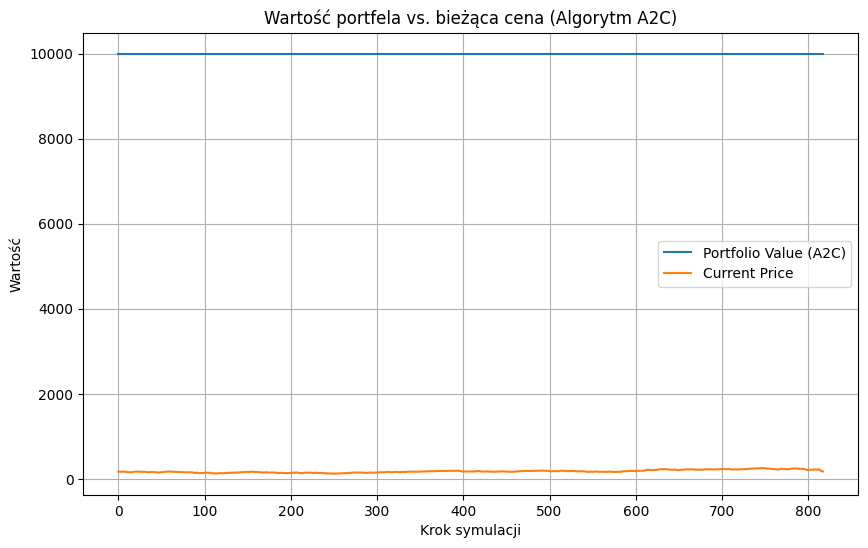

In [50]:
import matplotlib.pyplot as plt

# Reset środowiska przed testowym "rolloutem"
obs = vec_env.reset()
done = [False]

# Listy do gromadzenia wyników
portfolio_values = []
current_prices = []
previous_prices = []
steps = []

# Uzyskujemy dostęp do faktycznego środowiska (SimpleTradingEnv)
env_ = vec_env.envs[0]

step_count = 0

while not done[0]:
    # Decyzja agenta (A2C) na podstawie bieżącej obserwacji
    action, _states = model_a2c.predict(obs, deterministic=True)

    # Wykonanie akcji
    obs, reward, done, info = vec_env.step(action)

    # Pobieramy aktualną i poprzednią cenę
    current_price = env_.df.loc[env_.current_step, 'Close']
    prev_price = (env_.df.loc[env_.current_step - 1, 'Close']
                  if env_.current_step > 0
                  else current_price)

    # Wyliczamy bieżącą wartość portfela
    portfolio_value = env_.balance
    if env_.position == 1:
        portfolio_value += (current_price - prev_price)

    # Zapis do list
    portfolio_values.append(portfolio_value)
    current_prices.append(current_price)
    previous_prices.append(prev_price)
    steps.append(step_count)

    step_count += 1

# Podgląd pierwszych kilku rekordów
print("Pierwsze rekordy rollout:")
for i in range(min(5, len(steps))):
    print(f"Step={steps[i]} | Prev={previous_prices[i]} | "
          f"Curr={current_prices[i]} | Portfolio={portfolio_values[i]}")

plt.figure(figsize=(10,6))
plt.plot(steps, portfolio_values, label="Portfolio Value (A2C)")
plt.plot(steps, current_prices, label="Current Price")
plt.xlabel("Krok symulacji")
plt.ylabel("Wartość")
plt.title("Wartość portfela vs. bieżąca cena (Algorytm A2C)")
plt.grid(True)
plt.legend()
plt.show()

### **5.3. PPO (Proximal Policy Optimization)**

Zbalansowanie między eksploracją a stabilnością

**PPO** to algorytm Actor-Critic, który ogranicza, jak bardzo można zaktualizować politykę między kolejnymi krokami, aby uniknąć gwałtownych zmian i zachować stabilność.

Mechanizm „klipowania” (clipping): PPO ogranicza stosunek (ratio) nowej polityki do starej polityki, by unikać nadmiernych skoków w parametrach.


**Zalety:**

Stabilność uczenia – mniejsze skoki w wartości polityki w porównaniu z klasycznymi metodami policy gradient.

Dobra wydajność – PPO jest często używanym algorytmem RL „z pudełka” do wielu zastosowań, w tym do strategii tradingowych.

Łatwość dostosowania – można łatwo wstawić niestandardową funkcję nagrody (premie za Sharpe Ratio, kary za drawdown).

**Ograniczenia:**

Wymaga dość dużych danych (epizodów), aby wytrenować stabilną politykę, zwłaszcza w środowiskach z rzadkimi nagrodami.

Hipotetyczna eksploracja w finansach może być ograniczona, jeśli agent uczy się z danych historycznych – realnie nie mamy „alternatywnych wszechświatów” rynkowych.


Dokumentacja: (https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html)

**Przykładowy kod z użyciem SB3 (PPO)**

In [51]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

env = SimpleTradingEnv(df=some_financial_data)
vec_env = DummyVecEnv([lambda: env])

model_ppo = PPO(
    policy="MlpPolicy",
    env=vec_env,
    learning_rate=3e-4,  # lr ~0.0003
    n_steps=1024,        # liczba kroków przed wykonaniem aktualizacji
    batch_size=64,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.01,       # Współczynnik entropii -> większa eksploracja
    verbose=1
)

model_ppo.learn(total_timesteps=30000)


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Using cuda device
-----------------------------
| time/              |      |
|    fps             | 559  |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 1024 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 457         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 2048        |
| train/                  |             |
|    approx_kl            | 0.009444961 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | 8.27e-05    |
|    learning_rate        | 0.0003      |
|    loss                 | 25.7        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00214    |
|    value_loss           | 47.9        |
-----------------------------------------
----------------

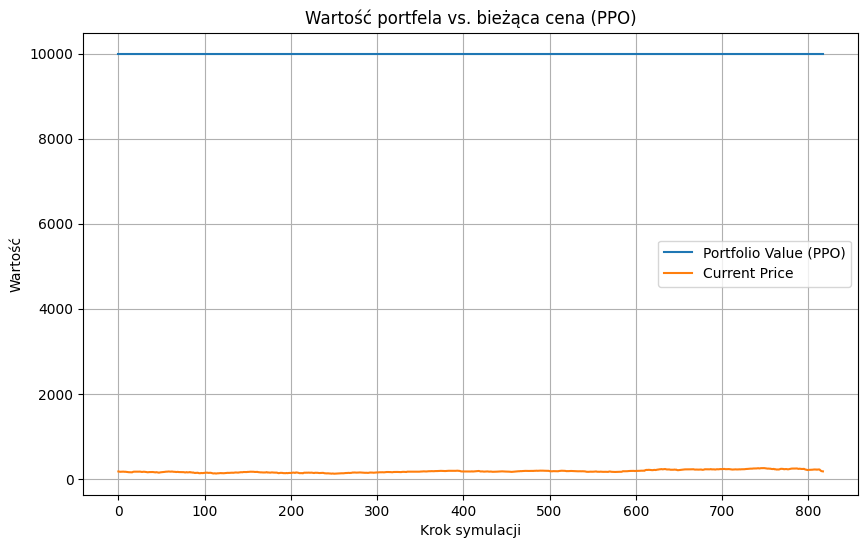

In [52]:
import matplotlib.pyplot as plt

# reset środowiska przed "rolloutem"
obs = vec_env.reset()
done = [False]

portfolio_values = []
current_prices = []
steps = []

env_ = vec_env.envs[0]

step_count = 0

while not done[0]:
    # agent wybiera akcję
    action, _states = model_ppo.predict(obs, deterministic=True)

    # wykonanie akcji
    obs, reward, done, info = vec_env.step(action)

    # aktualna cena
    current_price = env_.df.loc[env_.current_step, 'Close']
    if env_.current_step > 0:
        prev_price = env_.df.loc[env_.current_step - 1, 'Close']
    else:
        prev_price = current_price

    # wartość portfela = balance + ewentualny niezrealizowany zysk
    portfolio_value = env_.balance
    if env_.position == 1:
        portfolio_value += (current_price - prev_price)

    # zapis wyników do list
    portfolio_values.append(portfolio_value)
    current_prices.append(current_price)
    steps.append(step_count)

    step_count += 1

# wizualizacja
plt.figure(figsize=(10,6))
plt.plot(steps, portfolio_values, label="Portfolio Value (PPO)")
plt.plot(steps, current_prices, label="Current Price")
plt.xlabel("Krok symulacji")
plt.ylabel("Wartość")
plt.title("Wartość portfela vs. bieżąca cena (PPO)")
plt.grid(True)
plt.legend()
plt.show()


### **5.4. DDPG (Deep Deterministic Policy Gradient) i SAC (Soft Actor-Critic)**


Szczególnie przydatne w problemach ciągłego podejmowania decyzji

Akcje ciągłe: Zamiast ograniczać się do „kup/sprzedaj/trzymaj”, można mieć przedział [−1,1], który np. określa wielkość pozycji.

**DDPG:**

Łączy pomysł deterministycznego policy gradientu z replay bufferem (podobnie jak w DQN).

Uczy się funkcji Q (Critic) i jednocześnie polityki (Actor), która mapuje stany na akcje (w przestrzeni ciągłej).

**SAC (Soft Actor-Critic):**

Zawiera element entropy maximization, który zachęca agenta do eksploracji.

Często bardziej stabilny i odporny na zbieganie do lokalnych optimum w porównaniu z DDPG.



**Zalety:**

Elastyczność akcji: Można precyzyjnie kontrolować wielkość pozycji, co w finansach jest bardzo naturalne (nie zawsze chcemy jedynie full-kupno lub full-sprzedaż).

Lepsza eksploracja (szczególnie w SAC) – ważna w kontekście niestacjonarnych rynków, gdzie agent musi „testować” różne strategie.

Nowoczesne metody – w literaturze często wymieniane jako state-of-the-art w ciągłych zadaniach kontrolnych (również w robotyce).

**Ograniczenia:**

Większa złożoność implementacji (choć SB3 nam to ułatwia).

Potrzeba większej liczby epizodów w porównaniu do prostych metod (np. Q-learning).

Trudność w doborze hiperparametrów (learning rate, wielkość replay buffer, itp.).



Dokumentacja:
* DDPG (https://stable-baselines3.readthedocs.io/en/master/modules/ddpg.html)
* SAC (https://stable-baselines3.readthedocs.io/en/master/modules/sac.html)

**Przykładowy kod z użyciem SB3 (SAC)**

W pierwszej kolejności przygotowujemy środowisko (Gym), podobna implementacja do SimpleTradingEnv, ale z continuous action_space.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

import gym
from gym import spaces
from stable_baselines3 import SAC
from stable_baselines3.common.vec_env import DummyVecEnv



class ContinuousTradingEnv(gym.Env):
    """
    Proste środowisko do 'continuous action':
      - Akcje: [-1, 1] => short, long lub wartości pośrednie.
      - Obserwacja: [aktualna_cena, saldo, pozycja].
      - Reward = przyrost kapitału (day-to-day),
        a na końcu epizodu = + (balance - initial_balance).
    """

    def __init__(self, df, initial_balance=10000):
        super(ContinuousTradingEnv, self).__init__()

        # Przyjmujemy, że df ma jedną kolumnę 'Close' i indeks 0..N-1
        self.df = df.reset_index(drop=True).copy()
        self.initial_balance = float(initial_balance)

        # Akcja ciągła: [-1,1]
        self.action_space = spaces.Box(
            low=-1.0,
            high=1.0,
            shape=(1,),
            dtype=np.float32
        )

        # Obserwacja: [cena, saldo, pozycja]
        self.observation_space = spaces.Box(
            low=-np.inf,
            high=np.inf,
            shape=(3,),
            dtype=np.float32
        )

        self.reset()

    def _get_observation(self):
        price = self.df.loc[self.current_step, 'Close']
        return np.array([price, self.balance, self.position], dtype=np.float32)

    def step(self, action):
        """
        action: np.array o shape=(1,) z wartościami w [-1,1],
                np. -1 = short, +1 = long, 0.3=30% long, itp.
        """
        # Cena poprzednia
        prev_price = self.df.loc[self.current_step, 'Close']

        self.current_step += 1
        done = (self.current_step >= len(self.df) - 1)

        # Cena bieżąca
        current_price = self.df.loc[self.current_step, 'Close']

        # Wyliczamy zysk: (różnica cen) * action
        # Zakładamy 1 "kontrakt" * action
        profit = (current_price - prev_price) * action[0]
        self.balance += profit

        # Ustawienie pozycji (wartość akcji)
        self.position = action[0]

        # Nagroda = bieżący przyrost kapitału
        reward = float(profit)

        # Na koniec epizodu: premia/kara za finalne saldo
        if done:
            reward += (self.balance - self.initial_balance)

        obs = self._get_observation()
        return obs, reward, done, {}

    def reset(self):
        self.current_step = 0
        self.balance = self.initial_balance
        self.position = 0.0
        return self._get_observation()


In [61]:
df_raw = yf.download("AAPL", start="2022-01-01", end="2025-04-08", progress=False)

# Wybieramy tylko kolumnę "Close"
# Upewniamy się, że to nie MultiIndex
if isinstance(df_raw.columns, pd.MultiIndex):
    # spłaszczamy do 1 poziomu
    df_raw.columns = df_raw.columns.droplevel([i for i in range(1, df_raw.columns.nlevels)])

df_data = df_raw[["Close"]].copy().dropna()
df_data.reset_index(drop=True, inplace=True)

print("Rozmiar DF:", df_data.shape)
print(df_data.head())


Rozmiar DF: (818, 1)
Price       Close
0      178.879898
1      176.609650
2      171.911819
3      169.042038
4      169.209106


In [62]:
env = ContinuousTradingEnv(df=df_data, initial_balance=10000)
vec_env = DummyVecEnv([lambda: env])

model_sac = SAC(
    policy="MlpPolicy",
    env=vec_env,
    learning_rate=3e-4,
    buffer_size=30000,  # bufor
    batch_size=256,
    gamma=0.99,
    tau=0.02,
    ent_coef="auto",
    verbose=1
)

model_sac.learn(total_timesteps=20000)

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cuda device
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 81       |
|    time_elapsed    | 40       |
|    total_timesteps | 3268     |
| train/             |          |
|    actor_loss      | 3.33e+03 |
|    critic_loss     | 52.1     |
|    ent_coef        | 2.59     |
|    ent_coef_loss   | -30.3    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3167     |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 82       |
|    time_elapsed    | 79       |
|    total_timesteps | 6536     |
| train/             |          |
|    actor_loss      | 8.96e+03 |
|    critic_loss     | 911      |
|    ent_coef        | 6.89     |
|    ent_coef_loss   | -61.6    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6435     |
---------------------------------
------------------------------

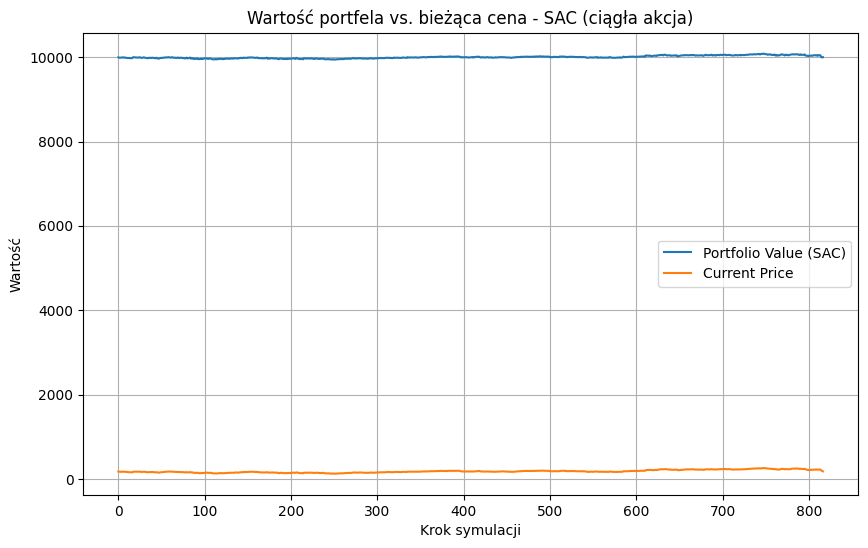

In [63]:
obs = vec_env.reset()
done = [False]

portfolio_values = []
current_prices = []
steps = []

env_ = vec_env.envs[0]
step_count = 0

while not done[0]:
    # Decyzja agenta
    action, _states = model_sac.predict(obs, deterministic=True)
    # Wykonanie akcji
    obs, reward, done, info = vec_env.step(action)

    current_price = env_.df.loc[env_.current_step, "Close"]
    if env_.current_step > 0:
        prev_price = env_.df.loc[env_.current_step - 1, "Close"]
    else:
        prev_price = current_price

    portfolio_value = env_.balance
    if abs(env_.position) > 1e-6:
        # Prosty day-to-day zysk
        portfolio_value += (current_price - prev_price) * env_.position

    portfolio_values.append(portfolio_value)
    current_prices.append(current_price)
    steps.append(step_count)

    step_count += 1

# Rysowanie wykresu
plt.figure(figsize=(10,6))
plt.plot(steps, portfolio_values, label="Portfolio Value (SAC)")
plt.plot(steps, current_prices, label="Current Price")
plt.xlabel("Krok symulacji")
plt.ylabel("Wartość")
plt.title("Wartość portfela vs. bieżąca cena - SAC (ciągła akcja)")
plt.grid(True)
plt.legend()
plt.show()

In [68]:
min(portfolio_values), max(portfolio_values), portfolio_values[:1]

(np.float64(9939.948501586914),
 np.float64(10081.963333129883),
 [np.float64(9995.459503173828)])

### **5.5. Porównanie algorytmów**


```
| Algorytm | Typ akcji                                     | Kluczowe cechy                                                          | Stabilność        | Złożoność |
|----------|-----------------------------------------------|-------------------------------------------------------------------------|-------------------|-----------|
|   DQN    | Dyskretne                                     | Proste do zrozumienia, skuteczne w małych przestrzeniach akcji          | Średnia           | Średnia   |
| A2C/A3C  | Dyskretne (lub ciągłe, z modyfikacjami)       | Równoległe trenowanie, Actor-Critic                                     | Średnia / Dobra   | Średnia   |
|   PPO    | Dyskretne (i wersje ciągłe)                   | Bardzo popularne, clipping ogranicza duże fluktuacje w polityce         | Wysoka            | Średnia   |
|   DDPG   | Ciągłe                                        | Deterministyczna polityka, replay buffer                                | Czasem wrażliwy   | Wyższa    |
|   SAC    | Ciągłe                                        | Entropy maximization, stabilna i dobra eksploracja                      | Bardzo dobra      | Wyższa    |

```




**Najważniejsze wnioski**

* Wybór algorytmu zależy od rodzaju akcji: DQN / PPO dla dyskretnych (kup, sprzedaj, trzymaj), DDPG / SAC dla ciągłych (wielkość pozycji).

* **Stabilność:** PPO i SAC uchodzą za bardziej stabilne algorytmy niż choćby DQN w złożonych problemach.

* **Implementacja:** W praktyce warto skorzystać z gotowych rozwiązań (SB3, RLlib), zamiast pisać wszystko od zera.

* **Wyzwania w finansach:** Niestacjonarność danych, rzadkie nagrody, duża wrażliwość na outliers, konieczność regularnego retrainingu.

W kontekście optymalizacji portfela i strategii tradingowych, te algorytmy dają szerokie możliwości dynamicznego zarządzania ryzykiem, testowania różnych polityk inwestycyjnych i reagowania na zmiany rynkowe. Zanim jednak przejdzie się do realnego wdrożenia, należy zadbać o backtesting, testy out-of-sample oraz mechanizmy risk management (VaR, CVaR, drawdown).



---



## **6. Jak zbudować prosty model RL dla portfela (zarys)**

### **6.1. Definiowanie środowiska**


Z perspektywy biblioteki typu Gym musimy zaimplementować:

* **observation_space**: co agent dostaje jako „stan” z otoczenia (np. ceny historyczne, wskaźniki),

* **action_space**: jakie akcje może podjąć agent (kup, sprzedaj, trzymaj – lub w wersji bardziej zaawansowanej: różne poziomy zaangażowania kapitału),

* **step(action)**: jak wygląda przejście w środowisku po podjęciu akcji (aktualizacja portfela, naliczenie nagrody),

* **reset()**: inicjalizację środowiska do stanu początkowego (np. początek okresu backtestu).



Przykładowe dane wymagane przez model:

**Stany (states):**

Przykładowo: [cena akcji w dniu dzisiejszym, 5-dniowa średnia krocząca, 10-dniowa średnia krocząca, wolumen, itp.].

Możemy też dodać wskaźniki fundamentalne (np. P/E) lub nastrojowe (np. sentyment z social media), jeśli mamy dane.

**Akcje (actions):**

Załóżmy 3 dyskretne działania: 0 = „sprzedaj”, 1 = „trzymaj”, 2 = „kup”.

W bardziej zaawansowanej wersji można pozwolić na działania ciągłe: [−1,+1], gdzie -1 oznacza krótką pozycję, +1 pozycję długą, a wartości pośrednie to częściowa ekspozycja.

**Nagroda (reward):**

Podstawowy przykład: zmiana wartości portfela między kolejnymi krokami (daily PnL).

Możemy wzbogacić tę funkcję nagrody np. o kary za duże obsunięcia kapitału (drawdown) albo stosować Sharpe Ratio czy miary ryzyka (VaR, CVaR).

Poniżej pokazany jest minimalny przykład klasy środowiska w stylu Gym (prezentowane w [punkcie 4.5](#scrollTo=4_5_Bazowe_rodowisko)):

In [ ]:
import gym
import numpy as np
from gym import spaces

class SimpleTradingEnv(gym.Env):
    def __init__(self, df, initial_balance=10000):
        super(SimpleTradingEnv, self).__init__()

        # dane historyczne (w tym wypadku wykorzystujemy cenę 'Close' -> dane zdefiniowna na początku dokuemntu)
        self.df = df.reset_index(drop=True)

        # saldo początkowe
        self.initial_balance = initial_balance

        # definicja akcji: 3 akcje dyskretne (sprzedaj, trzymaj, kup)
        self.action_space = spaces.Discrete(3)

        # definicja obserwacji (stanów)
        # w tym przykładzie będzie to tablica: [cena, 5-dniowa SMA, 10-dniowa SMA, aktualny cash, aktualna pozycja] (niżej definicja)
        self.observation_space = spaces.Box(
            low=-np.inf,
            high=np.inf,
            shape=(5,),
            dtype=np.float32
        )

        self.reset()

    def _get_observation(self):
        # obliczamy 5-dniową i 10-dniową średnią kroczącą
        sma5 = self.df['Close'].rolling(5).mean().iloc[self.current_step]
        sma10 = self.df['Close'].rolling(10).mean().iloc[self.current_step]

        # tworzymy wektor obserwacji: [cena, SMA5, SMA10, posiadany kapitał, aktualna pozycja]
        obs = np.array([
            self.df.loc[self.current_step, 'Close'],
            sma5 if not np.isnan(sma5) else 0.0,
            sma10 if not np.isnan(sma10) else 0.0,
            self.balance,
            self.position
        ], dtype=np.float32)

        return obs

    def step(self, action):
        # zachowujemy poprzednią cenę do wyliczenia zysku/straty
        prev_price = self.df.loc[self.current_step, 'Close']

        # aktualizujemy krok w czasie
        self.current_step += 1

        # sprawdzamy czy nie koniec danych
        done = (self.current_step >= len(self.df) - 1)

        # aktualna cena
        current_price = self.df.loc[self.current_step, 'Close']

        # obliczenie nagordy: zysku/straty w zależności od akcji
        reward = 0

        # określenie akcji: mamy jedną sztukę aktywa na +1, -1 lub 0
        if action == 0:  # akcja "sprzedaj"
            if self.position == 1:
                # realizacja zysku/straty
                profit = (current_price - prev_price) * 1
                self.balance += profit
            self.position = 0

        elif action == 1:  # akcja "trzymaj"
            # jeżeli mamy pozycję 1, zysk/strata jest ciągła
            # reward obliczamy przy kolejnym stepie
            pass

        elif action == 2:  # akcja "kup"
            if self.position == 0:
                # zakładamy kupno 1 sztuki po aktualnej cenie
                pass
            self.position = 1

        # jeżeli mamy otwartą pozycję w danym kroku, zysk/strata to różnica cen
        if self.position == 1:
            reward = (current_price - prev_price) * 1

        # TODO: można dodać kary za duży drawdown, koszty transakcyjne, itp.
        # ....
        # ....

        # aktualizacja obserwacji
        obs = self._get_observation()

        # wartość portfela: gotówka + ewentualny niezrealizowany PnL
        portfolio_value = self.balance
        if self.position == 1:
            portfolio_value += (current_price - prev_price)

        # ewentualny koniec epizodu
        if done:
            # możemy dodać niewielką premię/karę na koniec (np. końcowa wartość portfela - initial_balance)
            reward += (portfolio_value - self.initial_balance)

        return obs, reward, done, {}

    def reset(self):
        self.current_step = 0
        self.balance = self.initial_balance
        self.position = 0  # 1 - długa pozycja, 0 - brak pozycji

        # aby prawidłowo obliczyć rolling mean od początku, trzeba pominąć pierwsze n-kroków (pozostawiam na potrzebę prezentacji)
        return self._get_observation()


### **6.2. Konfiguracja i trening**

**Dane historyczne i preprocessing**

W praktyce dane pochodzą często z baz danych lub serwisów zewnętrznych.

Bazujemy na danych w formacie DataFrame (pandas) z kolumną Close, ewentualnie OHLCV (Open, High, Low, Close, Volume).

Dane możemy wzbogać o kolejne paramterym np dane z oreder book, czy własne wskaźniki (obliczane wstępnie np. za pomocą ta-lib lub pandas_ta).



**Implementacja treningu z SB3**

Zakładamy, że mamy gotowe środowisko SimpleTradingEnv (zdefinowane wcześniej). Teraz można użyć Stable Baselines3 z algorytmem PPO:

In [ ]:
import pandas as pd
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

# zakładamy, że mamy plik CSV z kolumną 'Date' i 'Close'
df = pd.read_csv("example_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

env = SimpleTradingEnv(df, initial_balance=10000)

# wekroeowy wraper dla SB3
vec_env = DummyVecEnv([lambda: env])

model = PPO(
    policy="MlpPolicy", # prosta sieć neuronowa (MLP) jako Actor
    env=vec_env,
    verbose=1,
    # model można rozszerzać poprzez dodatkowe  hyperparametry,
    # np. learning_rate, gamma, batch_size, itd.
)

# Trening (np. 10k timesteps)
model.learn(total_timesteps=10000)

# Zapis modelu (opcjonalnie)
model.save("ppo_trading_model")


### **6.3. Backtesting i walidacja**

Po wytrenowaniu modelu chcemy sprawdzić, jak zachowuje się agent na danych niewykorzystanych w treningu (tzw. out-of-sample test, walidacja).

3.1. Ocena na danych historycznych niewidocznych w treningu

Dzielimy dane: np. 70% danych do treningu, 30% do testu.

Tworzymy nowe środowisko na danych testowych i ładujemy wytrenowany model PPO.

In [ ]:
# Setup danych: 70% train, 30% test
train_size = int(len(df) * 0.7)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

# srodowisko treningowe
env_train = SimpleTradingEnv(df_train)
vec_env_train = DummyVecEnv([lambda: env_train])

# srodowisko testowe
env_test = SimpleTradingEnv(df_test)
vec_env_test = DummyVecEnv([lambda: env_test])

# trening
model = PPO("MlpPolicy", vec_env_train, verbose=1)
model.learn(total_timesteps=10000)

# testowanie
obs = vec_env_test.reset()
done, state = [False], None
rewards = []
portfolio_values = []

while not done[0]:
    action, state = model.predict(obs, state=state, deterministic=True)
    obs, reward, done, info = vec_env_test.step(action)
    rewards.append(reward[0])
    # można wyciągać portfolio_value z info, jeśli modyfikujemy step() w environment
    # tu przykładowo portfolio_value jest zakodowane w obserwacjach (5 element to "balance + pozycja")

print("Suma nagrod (test):", np.sum(rewards))


 Sprawdzenie stabilności i adaptacyjności modelu

Wykres kapitału w czasie: sprawdzamy, czy agent rzeczywiście zarabia, czy minimalizuje straty w okresach spadkowych.

**Analiza kluczowych metryk:**

Cumulative Return, Drawdown, Sharpe Ratio, Sortino Ratio.

Można też wstawić w funkcję nagrody parametry związane z ryzykiem, np. VaR czy CVaR.



**Przykładowe miary do analizy**

In [ ]:
import numpy as np

def sharpe_ratio(returns, risk_free_rate=0.00):
    # dla uproszczenia: returns w ujęciu dziennym
    # r = mean(returns - risk_free) / std(returns)
    excess_returns = returns - risk_free_rate
    return np.mean(excess_returns) / (np.std(excess_returns) + 1e-9)

def max_drawdown(cumulative_returns):
    # cumulative_returns to np. np.cumsum(returns) lub wartość portfela
    peak = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns - peak) / peak
    return np.min(drawdown)

# Sharpe Ratio i Max Drawdown po zebraniu serii dziennych zwrotów
sr = sharpe_ratio(returns)
mdd = max_drawdown(cumulative_returns)
print(f"Sharpe Ratio: {sr:.2f}, Max Drawdown: {mdd:.2%}")


Uwaga: Kod powyżej to jedynie przykład. Zależnie od sposobu liczenia returns i cumulative_returns trzeba go dostosować do swojego środowiska i sposobu przechowywania wyników.

### **6.5. Wyzwania i ograniczenia**


* **Ryzyko overfittingu** Przy zbyt jednoronycm zestawie danych lub zbyt małym zestawie paramterów model może zbyt dobrze dopasować się do specyficznych danych historycznych, nie radząc sobie na danych rzeczywistych (out-of-sample).

* **Konieczność testów w realnych warunkach rynkowych** Nawet najlepszy backtest nie gwarantuje sukcesu na żywo, ponieważ rynki są niestacjonarne i często zaskakują. Dodatkowo w takim wypadku trzeba uwzględnić koszty transakcyjne (prowizje, spready), slippage, szybkość egzekucji zleceń.

* **Skala i czas** Jeśli strategia ma działać w krótkim horyzoncie (np. day trading, HFT), konieczne mogą być bardziej szczegółowe dane (tick data, order book), co komplikuje proces i wymaga większej mocy obliczeniowej. Dodatkowo w przypadku HFT warto poszukać metod na optymalizację szybkości działania modelu.

* **Zależność od definicji nagrody** Zależlnie od funkcji nagrody (premie za stabilność, drawdown, włączenie ryzyka), taką politykę agent wypracuje. Źle zaprojektowana nagroda może prowadzić do niepożądanych zachowań (np. zbyt agresywnego ryzykowania).


### **6.4. Podsumowanie i dalsze kroki**

Krókie podsumowanie:

* **Agent – Środowisko – Nagroda** to schemat w jakmi poruszamy się modelu RL.

* **Funkcja nagrody** to kluczowy element w RL, w kontekście finansów uwzględniający profit/loss, Sharpe Ratio, czy nawet Value-at-Risk (jako karę za zbyt duże ryzyko).

* **Weryfikacja modeli** backtest i test out-of-sample to podstawowy i najprostrzy element pozwalający ocenić strategię inwestycyjnją

* **Wyzwania** niestacjonarność rynku, rzadkie nagrody (zyski/straty), konieczność ciągłej adaptacji modelu w czasie.



---



## **7. Podsumowanie i wnioski praktyczne**

### **7.1. Zalety RL w inwestycjach**

**Adaptacyjność**

Reinforcement Learning potrafi „uczyć się” z dynamicznie zmieniających się warunków rynkowych, aktualizując optymalną politykę (policy) na podstawie otrzymywanej nagrody/straty.

Jeżeli zmienia się reżim rynkowy (np. z trendu wzrostowego na trend boczny lub spadkowy), klasyczny model statystyczny może wymagać przebudowy. Agent RL, odpowiednio zaprojektowany, będzie „dostrajać się” w trakcie kolejnych kroków uczenia online lub w regularnych sesjach retrainingu.


**Modyfikacja funkcji nagrody (dowolne kryterium skuteczności)**


W RL mamy swobodę definiowania tego, co uznajemy za „nagrodę”. Możemy użyć klasycznego zysku, ale też uwzględnić dodatkowe aspekty, np. drawdown, VaR, CVaR, Sharpe Ratio, Sortino Ratio i inne miary ryzyka.

Jeśli chcemy skupić się na stabilnym zwrocie z ograniczeniem ryzyka, możemy skonstruować funkcję nagrody, która premiuje wysokie Sharpe Ratio oraz jednocześnie nakłada karę za przekroczenie założonej granicy Value-at-Risk.


### **7.2. Ograniczenia i środki zapobiegawcze**

**Potencjalnie wysokie ryzyko overfittingu**

Modele RL, podobnie jak inne algorytmy uczenia maszynowego, mogą dopasować się zbyt mocno do konkretnych warunków występujących w danych historycznych.

Objawy to np świetne wyniki na danych treningowych, ale słabe na danych testowych lub rzeczywistych. Innym przykładem jest rozbudowana architektura sieci neuronalnej (bardzo duża pojemność modelu) wytrenowana na ograniczonym zestawie danych.

Można temu zapobiec poprzez rygorystyczny backtest i walidacja krzyżowa (np. walk-forward analysis) – dzielimy dane na liczne segmenty czasowe, trenujemy i testujemy na przesuwającym się oknie.

Dodatkowo konieczne są regularne testy out-of-sample – sprawdzamy model na danych, których agent nigdy nie „widział” w trakcie treningu.

Regularny retraining – co jakiś czas od nowa uczymy agenta na nowszym wycinku danych.



**Niestabilność w ekstremalnych warunkach rynkowych (np. nagłe krachy)**

Rynki są niestacjonarne i okresowo pojawiają się skrajne zdarzenia (np. pandemie, wojny, flash crash). RL może mieć trudność z przewidzeniem tych zdarzeń, jeśli w danych historycznych były one rzadkie lub nieobecne.

Agent może podejmować zbyt agresywne decyzje inwestycyjne w okresach normalnych, co w sytuacjach ekstremalnych prowadzi do dużych strat.

Brak danych treningowych odzwierciedlających „czarne łabędzie” (black swans).

Częściowo można zdiagnozować lub zminilizować problem poprzez wprowadzenie scenariuszy stress testingowych – symulacja krachu rynkowego i obserwacja zachowania agenta.

Dodatkowo konieczne jest uwzględnienie miar ryzyka w nagrodzie (np. Value-at-Risk, Expected Shortfall/CVaR).

Niezmiennie jednak regularna obserwacja (wprowadzenie mechanizmów określających aktualny reżim/stan) kontekstu rynkowego – jeśli występują oznaki większego ryzyka, można przełączać model w tryb konserwatywny lub wywoływać częstszy retraining.

### **7.3. Wskazówki wdrożeniowe**

**Ciągła walidacja i monitoring modelu**

Model RL, zwłaszcza ten wdrażany w realnych warunkach rynkowych, może się „rozjechać” w wyniku zmiany reżimu rynkowego. Istotne jest, by stale śledzić kluczowe metryki (np. drawdown, zysk, liczba transakcji, eksploracja vs eksploatacja) i reagować w porę na negatywne trendy.

Dobrym pomysłem jest oczywiście budowa dashboardu do monitoringu w czasie rzeczywistym (np. z wykorzystaniem narzędzi typu Plotly Dash, Streamlit, czy narzędzi BI).


**Ciągła aktualizacja danych i retrain, testy out-of-sample**

Ze względu na niestacjonarność rynku, model RL powinien być okresowo odświeżany nowymi danymi.

**Przykładowy cykl pracy:**

1. Cotygodniowe odświeżenie modelu - retraining to uzupełnionym setupie danych
2. Backtesting i wdtrożenie w środowusku staginowym
3. Praca równoległa (na sucho) z aktualnie działającym modelem, na danych rynkowych,
4. W przypadku lepszych wyników, przełączenie modeli

**Metodyki pracy:**

Rolling window – przesuwające się okno danych (np. ostatnie 2 lata do treningu, a poprzednie tygodnie do testu).

Walk-forward optimization – podział danych na segmenty czasowe (np. 6 miesięcy trening, 1 miesiąc testu, potem przesuwasz i powtarzasz).



---



## **8. Czas na dyskusję**

...



---



## **9. Lista źródeł, materiały i linki**

### **9.1. Książki i publikacje**



**Podstawy RL**

* „Reinforcement Learning: An Introduction” – Richard S. Sutton, Andrew G. Barto, MIT Press
* „Algorithms for Reinforcement Learning” – Csaba Szepesvári

**RL w Finansach / Machine Learning w Tradingu**

* „Machine Learning for Algorithmic Trading” – Stefan Jansen, Packt
* „Advances in Financial Machine Learning” – Marcos López de Prado


**Bardziej zaawansowane tematy RL**

* „Deep Reinforcement Learning” – Yuxi Li (Springer)
* „Multi-Agent Reinforcement Learning: State of the Art” – Busoniu, Babuska, De Schutter


### **9.2. Artykuły naukowe i portale z publikacjami**

* arXiv.org - Najnowsze badania RL, ML i finansów (https://arxiv.org/)

* SSRN (Social Science Research Network) - Baza  artykułów nt. technik ML w finansach, badań empirycznych, modeli ryzyka (https://www.ssrn.com/) (https://papers.ssrn.com/)

* IEEE Xplore - artykuły konferencyjne i czasopisma naukowe dotyczące AI, ML, RL (https://ieeexplore.ieee.org/)
* The Evolution of Reinforcement Learning in Quantitative Finance (https://arxiv.org/html/2408.10932v1)

### **9.3. Blogi, portale i społeczności**



* Medium – tag: Reinforcement Learning (https://medium.com/tag/reinforcement-learning)

* Reddit /r/reinforcementlearning (https://www.reddit.com/r/reinforcementlearning/)

* QuantStart - (https://www.quantstart.com/)

* Kaggle - (https://www.kaggle.com/)

* OpenAI Blog - (https://openai.com/blog/) (https://spinningup.openai.com/en/latest/)

### **9.4. Biblioteki i narzędzia do RL**

* Stable Baselines3 (SB3) (https://stable-baselines3.readthedocs.io/en/master/)
* Ray RLlib - Dokumentacja (https://docs.ray.io/en/latest/rllib/index.html)
* Gym / Gymnasium (https://gym.openai.com/)
* Tianshou (https://github.com/thu-ml/tianshou)
* ACME (DeepMind) (https://dm-acme.readthedocs.io/en/latest/)
* Coach (Intel) (https://github.com/IntelLabs/coach)
* Optuna (https://optuna.org/)
* Hyperopt (https://hyperopt.github.io/hyperopt/)
* Keras RL (https://github.com/keras-rl/keras-rl)
* TF-agents (https://github.com/tensorflow/agents)
* Mushroom RL (https://mushroomrl.readthedocs.io/en/latest/)


### **9.5. Biblioteki i narzędzia do pracy z danymi finansowymi**


* Gym-anytrading - Gotowe środowiska RL do tradingu, kompatybilne z Gym (https://github.com/AminHP/gym-anytrading)

* Backtesting.py - Nieskomplikowana biblioteka do backtestów strategii (daje też pewną elastyczność do integracji z RL) (https://kernc.github.io/backtesting.py/)

* Zipline - Silnik do backtestów (wykorzystywany m.in. przez Quantopian), można zintegrować z RL (https://github.com/quantopian/zipline)

* Vectorbt - Zaawansowane narzędzie do backtestów w stylu wektorowym, integracja z Pandas i NumPy (https://vectorbt.dev/)

* PyPortfolioOpt - Optymalizacja portfela (klasyczne metody: Markowitz, risk parity, itp.)  (https://pyportfolioopt.readthedocs.io/en/latest/)

### **9.6. Zaawansowane obszary RL w finansach**


* Offline RL (Batch RL) - Zamiast trenować online, mamy duży zbiór historycznych danych (np. z transakcjami) i chcemy wytrenować agenta. Często użyteczne w finansach, gdzie symulacja jest kosztowna i musimy bazować na historycznych rekordach. D4RL: Datasets for Deep Data-Driven Reinforcement Learning (https://github.com/Farama-Foundation/D4RL)

* Meta-RL - RL, który uczy się „jak się uczyć” – przydatne w niestacjonarnych środowiskach. (https://arxiv.org/abs/2004.05439)

* Hierarchical RL (HRL) Dzieli zadanie na podzadania (np. zarządzanie portfelem może być rozbite na sub-strategie). (https://arxiv.org/abs/1805.08296)

* Multi-Agent RL (MARL) Gdy rozważamy wielu uczestników rynku (market makerzy, arbitrażyści) w interakcji, możemy badać MARL. (https://arxiv.org/abs/2312.10256)

* Distributional RL - Duża przydatność w finansach, gdzie kluczowe jest rozumienie ryzyka i ekstremów (ogon rozkładu). (https://arxiv.org/abs/1707.06887)

* Risk-Sensitive / Constrained RL - Wbudowywanie limitów ryzyka (np. VaR, CVaR) w algorytm RL – tzw. CRL (Constrained RL). (https://arxiv.org/abs/1810.09126)



---

